In [1]:
import os
import pickle
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from FLTrack.utils import load_file, remove_outliers, drop_columns, update_distribution

# Load and Prep

In [2]:
data_path = "../kv_data/kv/"
files = os.listdir(data_path)
ids = [file.split(".")[0] for file in files]
files_path = [os.path.join(data_path, file) for file in files]

In [3]:
dfs = [load_file(file) for file in files_path]

In [4]:
for i in dfs:
    drop_columns(i)

In [5]:
new_dfs = []
for df in dfs:
    new_df = remove_outliers(df,'label')
    new_dfs.append(new_df)

# Statistics of Data

In [6]:
statistics_list = []

for df in new_dfs:
    # Check if 'label' column exists in the DataFrame
    if 'label' in df.columns:
        # Calculate the metrics
        count = df['label'].count()
        min_val = round(df['label'].min(), 2)
        max_val = round(df['label'].max(), 2)
        mean_val = round(df['label'].mean(), 2)
        std = round(df['label'].std(), 2)
        
        # Append the results to the list
        statistics_list.append({'Count': count, 'Min': min_val, 'Max': max_val, 'Mean': mean_val, 'STD': std})

# Convert the list to a DataFrame
statistics = pd.DataFrame(statistics_list)

# Print the results
print(statistics)

    Count    Min    Max   Mean   STD
0   19024  51.09  62.17  55.00  2.31
1   28162  50.69  63.62  55.67  2.56
2   21959  51.02  61.94  54.70  2.18
3   23953  50.98  62.22  55.00  2.14
4   19024  51.09  62.17  55.00  2.31
5   28162  50.69  63.62  55.67  2.56
6   21959  51.02  61.94  54.70  2.18
7   23953  50.98  62.22  55.00  2.14
8   21959  51.02  61.94  54.70  2.18
9   23953  50.98  62.22  55.00  2.14
10  19024  51.09  62.17  55.00  2.31
11  28162  50.69  63.62  55.67  2.56
12  28162  50.69  63.62  55.67  2.56
13  19024  51.09  62.17  55.00  2.31
14  23953  50.98  62.22  55.00  2.14
15  21959  51.02  61.94  54.70  2.18
16  23953  50.98  62.22  55.00  2.14
17  21959  51.02  61.94  54.70  2.18
18  28162  50.69  63.62  55.67  2.56
19  19024  51.09  62.17  55.00  2.31
20  28162  50.69  63.62  55.67  2.56
21  19024  51.09  62.17  55.00  2.31
22  23953  50.98  62.22  55.00  2.14
23  21959  51.02  61.94  54.70  2.18


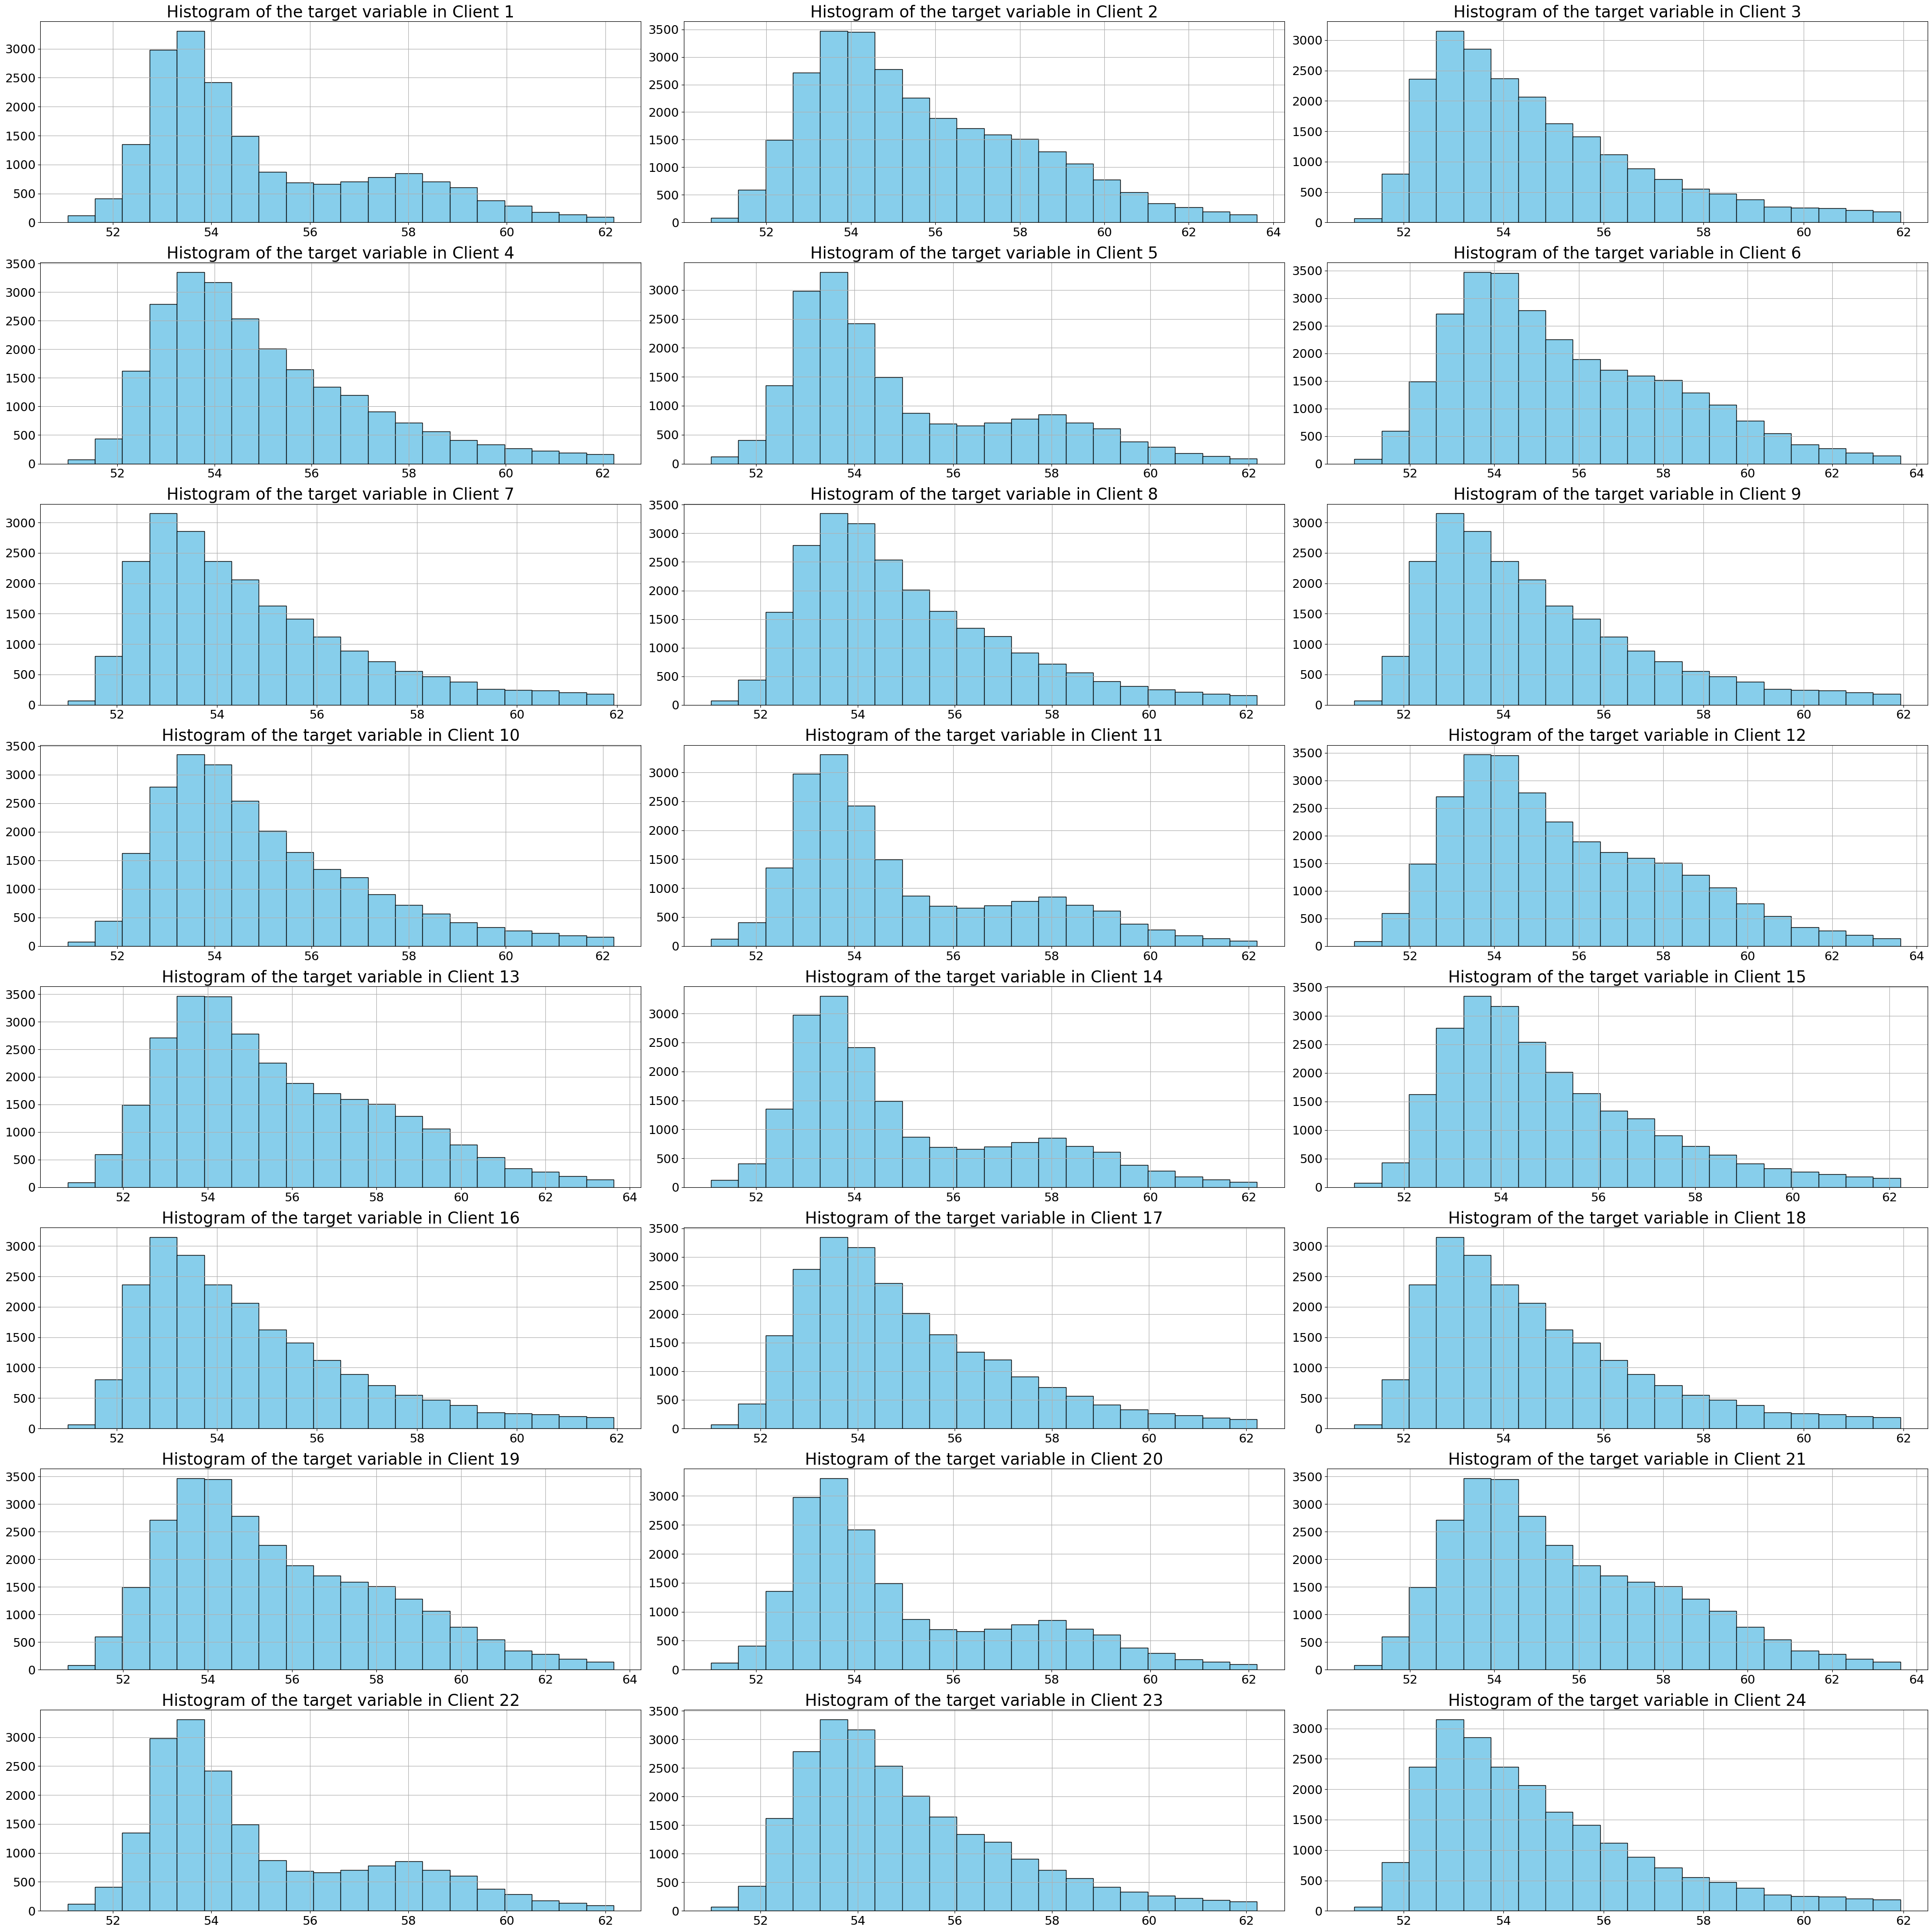

In [7]:
num_rows = len(new_dfs) // 3 + (len(new_dfs) % 3 > 0)

# Create a figure and subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(40, 40))

# Plot histograms for label column in each dataframe
for i, df in enumerate(new_dfs):
    label_column = df.columns[-1]  # Assuming label column is the last column
    ax = axes[i // 3, i % 3] if num_rows > 1 else axes[i % 3]
    df[label_column].hist(ax=ax, bins=20, color='skyblue', edgecolor='black')
    ax.set_title(f'Histogram of the target variable in Client {i+1}', fontsize=24)
    ax.tick_params(axis='x', labelsize=18)
    ax.tick_params(axis='y', labelsize=18) 

# Adjust layout and show plot
plt.tight_layout()
save_location = "plots/original_distributions.png"
plt.savefig(save_location)
plt.show()

# Anderson Darling Test

In [8]:
from scipy import stats
for feature in list(new_dfs[0].columns):
    samples = [i[feature].values for i in new_dfs]
    res = stats.anderson_ksamp(samples)
    res.statistic, res.pvalue

    if res.pvalue > 0.05:
        print(feature)

/var/folders/nc/qf87_4nn3qv8g_f3kl5wytb00000gn/T/ipykernel_9861/2715683689.py:4: UserWarning: p-value floored: true value smaller than 0.001. Consider specifying `method` (e.g. `method=stats.PermutationMethod()`.)
  res = stats.anderson_ksamp(samples)
/var/folders/nc/qf87_4nn3qv8g_f3kl5wytb00000gn/T/ipykernel_9861/2715683689.py:4: UserWarning: p-value capped: true value larger than 0.25. Consider specifying `method` (e.g. `method=stats.PermutationMethod()`.)
  res = stats.anderson_ksamp(samples)


eth1_rxdrop.s


# Updating the Distribution

In [9]:
number_of_data_points = [random.randint(2000, 15000) for _ in range(24)]
adj_means = [random.randint(-10, 10) for _ in range(24)]
adj_stds = [random.choice([num for num in range(-3, 6) if num != 0]) for _ in range(24)]

In [11]:
updated_dfs = []
for i in range(24):
    updated_dfs.append(update_distribution(new_dfs[i], adj_means[i], adj_stds[i], number_of_data_points[i]))   

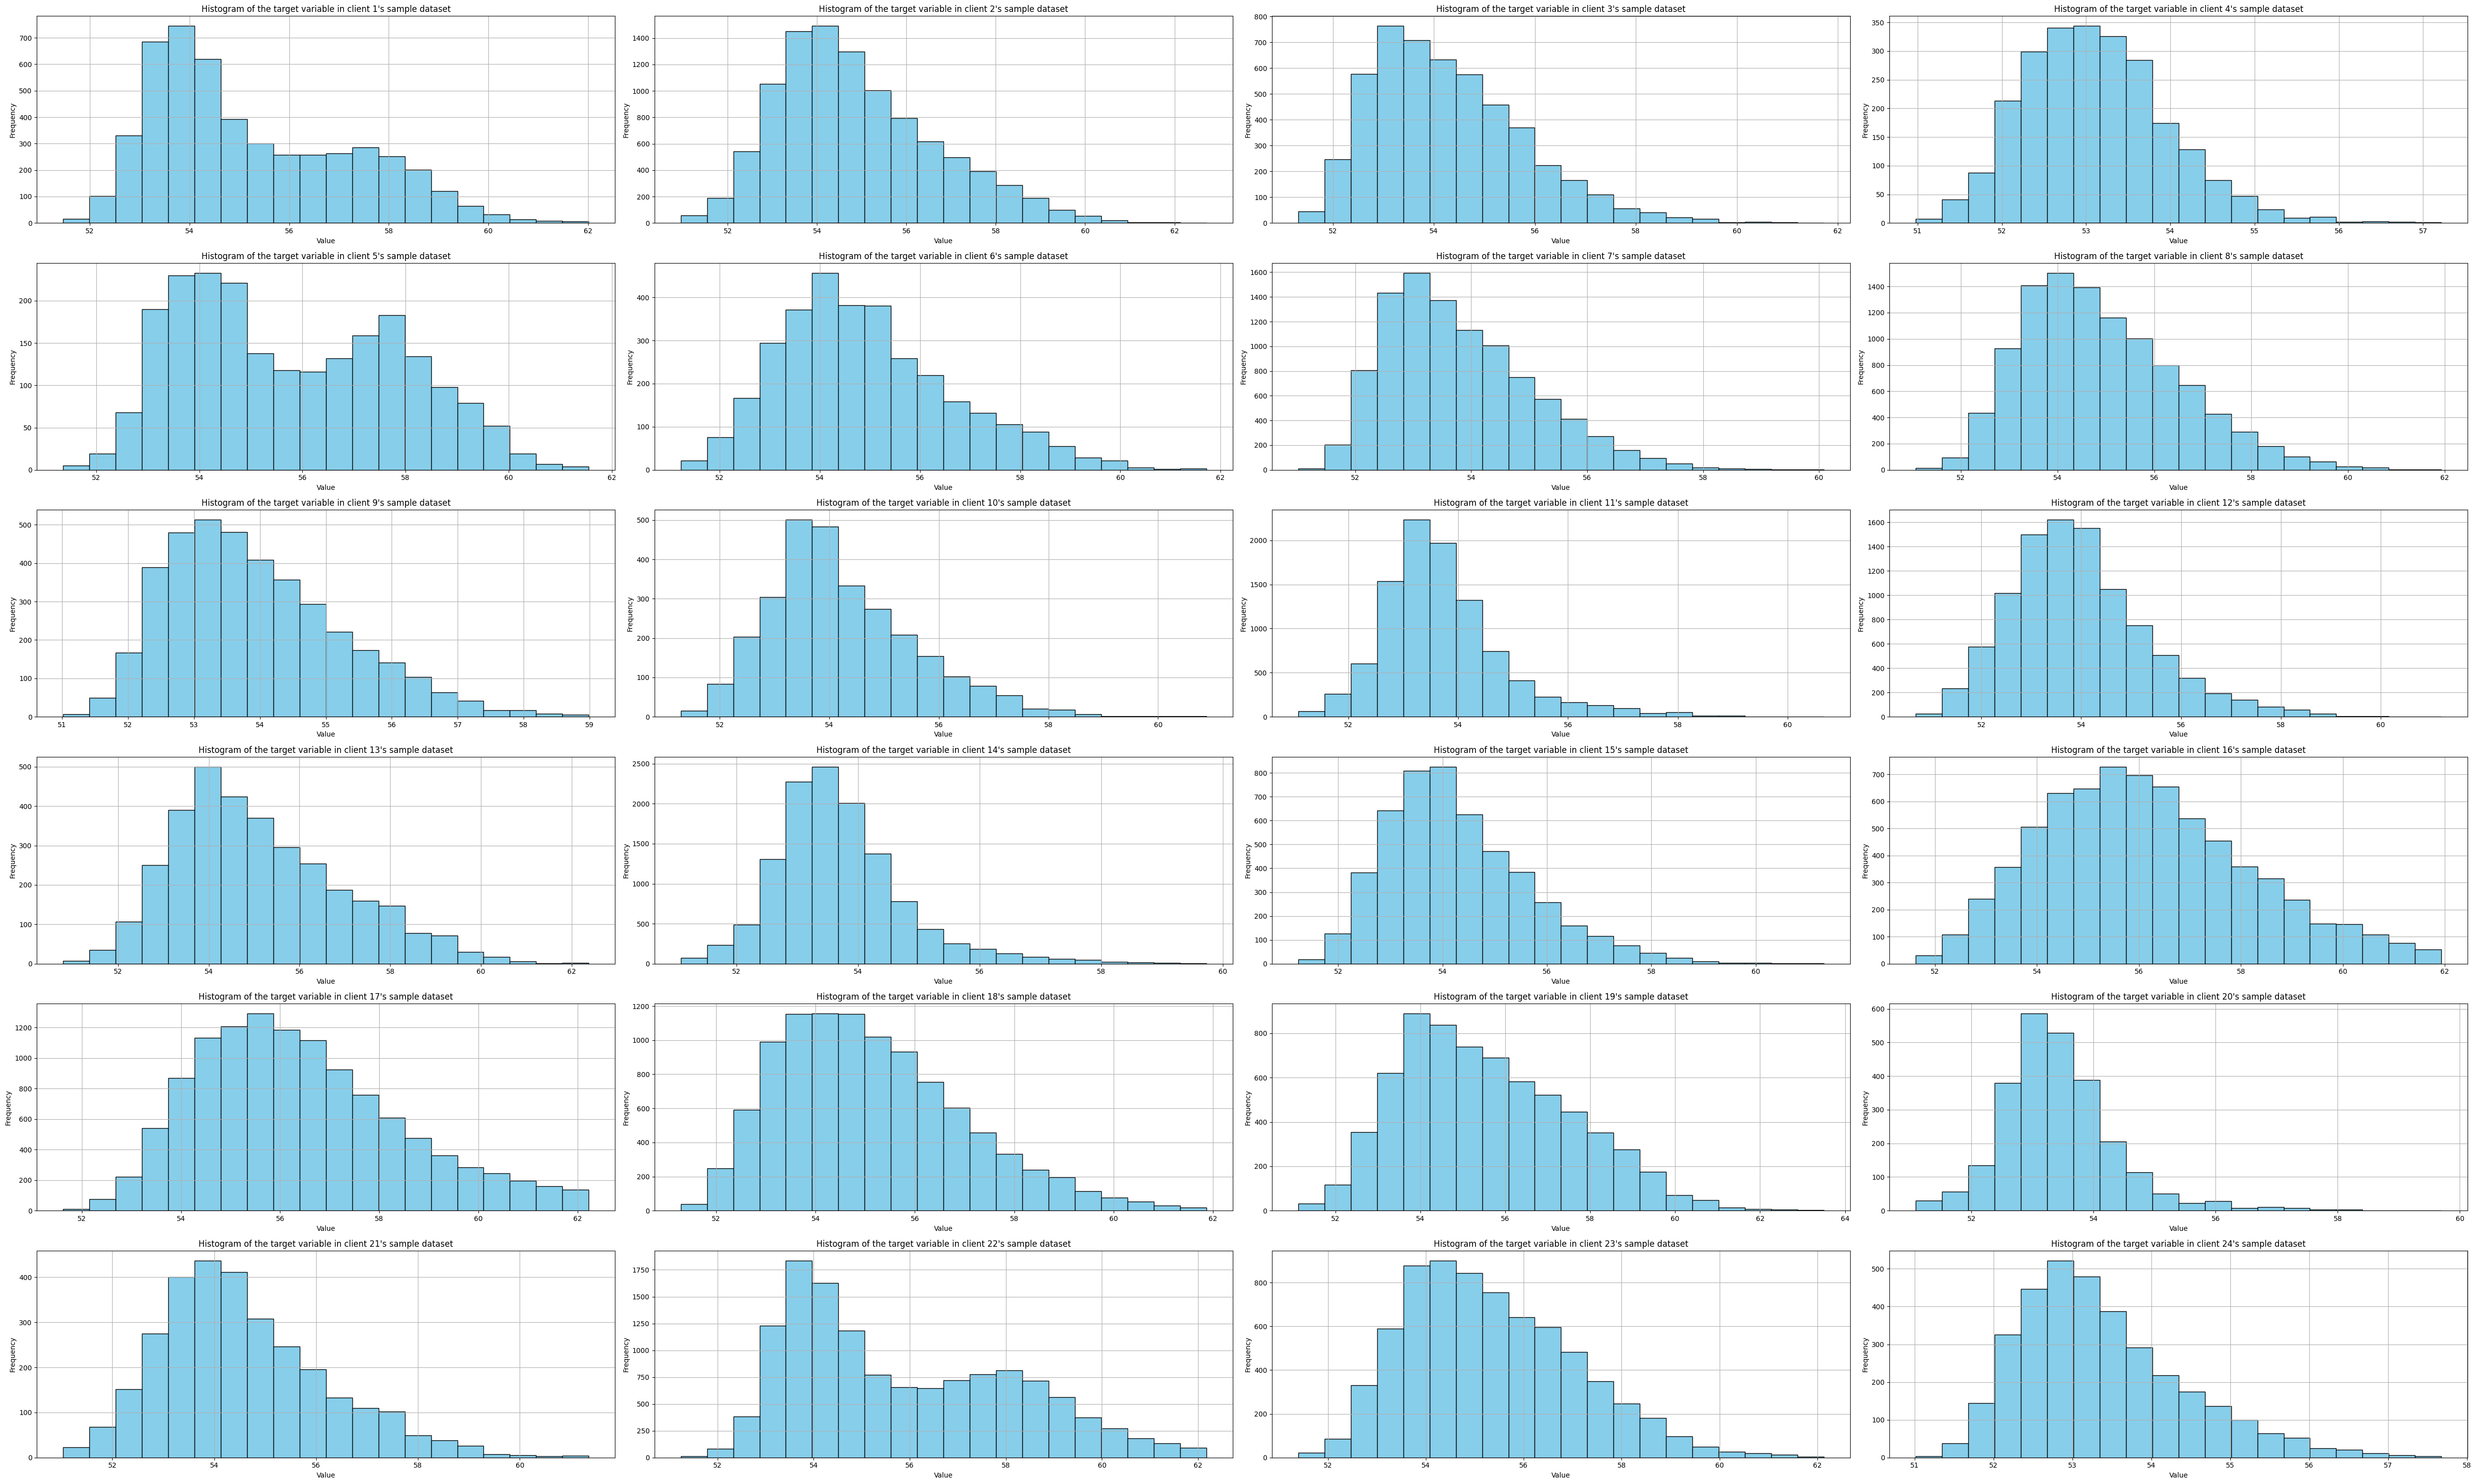

In [12]:
num_rows = len(updated_dfs) // 4 + (len(updated_dfs) % 4 > 0)

# Create a figure and subplots
fig, axes = plt.subplots(num_rows, 4, figsize=(50, 30))

# Plot histograms for label column in each dataframe
for i, df in enumerate(updated_dfs):
    label_column = df.columns[-1]  # Assuming label column is the last column
    ax = axes[i // 4, i % 4] if num_rows > 1 else axes[i % 4]
    df[label_column].hist(ax=ax, bins=20, color='skyblue', edgecolor='black')
    ax.set_title(f'Histogram of the target variable in client {i+1}\'s sample dataset')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [13]:
for i in range(24):
    file_name = "full_df/c"+str(i+1)+".csv"
    updated_dfs[i]#.to_csv(file_name, index=False)

## Statistics of sampled dataset

In [14]:
sampled_statistics_list = []

for df in new_dfs:
    # Check if 'label' column exists in the DataFrame
    if 'label' in df.columns:
        # Calculate the metrics
        count = df['label'].count()
        min_val = round(df['label'].min(), 2)
        max_val = round(df['label'].max(), 2)
        mean_val = round(df['label'].mean(), 2)
        std = round(df['label'].std(), 2)
        
        # Append the results to the list
        sampled_statistics_list.append({'Count': count, 'Min': min_val, 'Max': max_val, 'Mean': mean_val, 'STD': std})

# Convert the list to a DataFrame
sampled_statistics = pd.DataFrame(sampled_statistics_list)

# Print the results
print(sampled_statistics)

    Count    Min    Max   Mean   STD
0   19024  51.09  62.17  55.00  2.31
1   28162  50.69  63.62  55.67  2.56
2   21959  51.02  61.94  54.70  2.18
3   23953  50.98  62.22  55.00  2.14
4   19024  51.09  62.17  55.00  2.31
5   28162  50.69  63.62  55.67  2.56
6   21959  51.02  61.94  54.70  2.18
7   23953  50.98  62.22  55.00  2.14
8   21959  51.02  61.94  54.70  2.18
9   23953  50.98  62.22  55.00  2.14
10  19024  51.09  62.17  55.00  2.31
11  28162  50.69  63.62  55.67  2.56
12  28162  50.69  63.62  55.67  2.56
13  19024  51.09  62.17  55.00  2.31
14  23953  50.98  62.22  55.00  2.14
15  21959  51.02  61.94  54.70  2.18
16  23953  50.98  62.22  55.00  2.14
17  21959  51.02  61.94  54.70  2.18
18  28162  50.69  63.62  55.67  2.56
19  19024  51.09  62.17  55.00  2.31
20  28162  50.69  63.62  55.67  2.56
21  19024  51.09  62.17  55.00  2.31
22  23953  50.98  62.22  55.00  2.14
23  21959  51.02  61.94  54.70  2.18
